In [1]:
!pip install spacy
!pip install wordcloud

In [2]:
import numpy as np
import pandas as pd
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [3]:
Elon=pd.read_csv("D:\\ExcelR Assignments\\Text Mining\\Elon_musk.csv",error_bad_lines=False)
Elon

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
Elonmusk=Elon.iloc[:,1:]
Elonmusk.head()

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [5]:
Elonmusk=[Text.strip() for Text in Elonmusk.Text]
Elonmusk=[Text for Text in Elonmusk if Text]
Elonmusk[0:10]

['@kunalb11 I�m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [6]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


2021-11-06 16:27:23.386465: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-11-06 16:27:23.386523: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
nlp = spacy.load('en_core_web_md')
one_block=' '.join(map(str,Elonmusk))
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [8]:
for token in doc_block[0:20]:
    print(token,token.pos_)


@kunalb11 PROPN
I PRON
� VERB
m VERB
an DET
alien ADJ
@ID_AA_Carmack NOUN
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON


In [9]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:25])

['�', 'm', '@ID_AA_Carmack', 'tracing', 'level', 'tried', 'interview', 'underestimated', 'execution', 'year', 'underdoge', 'thought', 'fail', 'https://t.co/zGxJFDzzrM', '_', '@flcnhvy', 'thanks', 'Tweets', 'represent', 'world', 'time', 'allocation', 'outcome', 'sent', 'agree']


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,co,197
1,https,196
2,spacex,133
3,be,127
4,amp,101
5,flcnhvy,80
6,wholemarsblog,64
7,ppathole,52
8,have,49
9,is,48


In [11]:
print(words_freq)

[('co', 197), ('https', 196), ('spacex', 133), ('be', 127), ('amp', 101), ('flcnhvy', 80), ('wholemarsblog', 64), ('ppathole', 52), ('have', 49), ('is', 48), ('launch', 44), ('re', 36), ('erdayastronaut', 35), ('make', 33), ('people', 32), ('need', 31), ('nasaspaceflight', 31), ('year', 30), ('do', 29), ('production', 29), ('has', 28), ('id_aa_carmack', 27), ('coming', 25), ('time', 23), ('mission', 23), ('work', 23), ('get', 23), ('go', 21), ('lot', 21), ('teslaownerssv', 21), ('day', 21), ('flight', 21), ('engines', 20), ('point', 20), ('test', 20), ('austinbarnard45', 20), ('starship', 20), ('thanks', 19), ('years', 19), ('space', 18), ('week', 18), ('way', 18), ('berniesanders', 18), ('engine', 17), ('working', 17), ('engineering', 17), ('car', 17), ('use', 16), ('rocket', 16), ('life', 16), ('think', 16), ('orbit', 15), ('booster', 15), ('lexfridman', 15), ('landing', 15), ('are', 15), ('love', 15), ('cars', 15), ('days', 15), ('times', 15), ('rationaletienne', 14), ('done', 14), 

<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

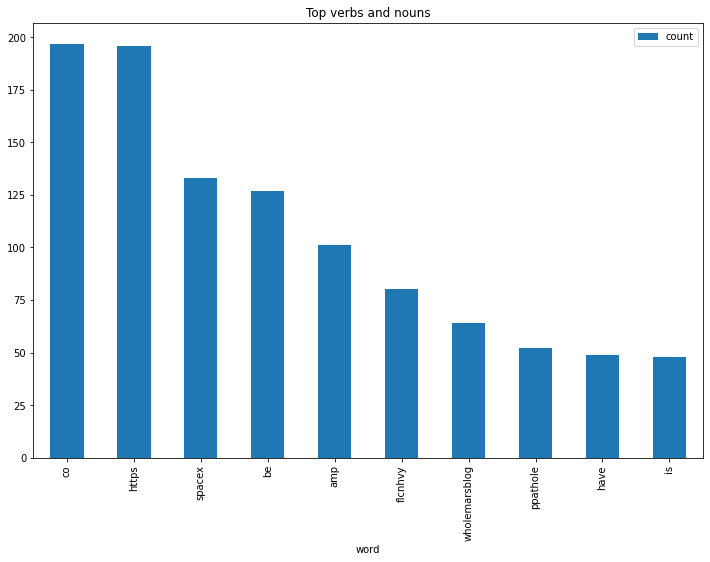

In [12]:
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [13]:
#Sentiment Analysis

In [19]:
positive=pd.read_csv("D:\\ExcelR Assignments\\Text Mining\\neg-words.txt",error_bad_lines=False)
positive.head()

,2-faced
0,2-faces
1,abnormal
2,abolish
3,abominable
4,abominably


In [20]:
negative=pd.read_csv("D:\\ExcelR Assignments\\Text Mining\\posi-words.txt",error_bad_lines=False)
negative.head()

,a+
0,abound
1,abounds
2,abundance
3,abundant
4,accessable


In [33]:
text = ' '.join(Elonmusk)
text

'@kunalb11 I�m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It�s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [66]:
sent = pd.DataFrame(Elonmusk, columns=['sentence'])
sent

,sentence
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [67]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shefs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [68]:
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) 
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])
text_tokens

['kunalb11', 'I�m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo']


['kunalb11',
 'I�m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 'Cl

In [69]:
lower_words = [x.lower() for x in text_tokens]
print(lower_words[0:25])

['kunalb11', 'i�m', 'an', 'alien', 'idaacarmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'is', 'underestimated']


In [72]:
my_stop_words=pd.read_csv("D:\\ExcelR Assignments\\Text Mining\\stop.txt")
my_stop_words.head()

,a
0,a's
1,able
2,about
3,above
4,according


In [73]:
no_stop_tokens = [word for word in lower_words if not word in my_stop_words]
print(no_stop_tokens[0:40])

['kunalb11', 'i�m', 'an', 'alien', 'idaacarmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'is', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for']


In [88]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [89]:
stemmed_tokens = [ps.stem(word) for word in no_stop_tokens]
print(stemmed_tokens[0:40])

['kunalb11', 'i�m', 'an', 'alien', 'idaacarmack', 'ray', 'trace', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tri', 'it', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'is', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'for', 'amaz', 'execut', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for']


In [90]:
doc = nlp(' '.join(stemmed_tokens))
print(doc[0:40])

kunalb11 i�m an alien idaacarmack ray trace on cyberpunk with hdr is nextlevel have you tri it joerogan spotifi great interview gtera27 doge is underestim teslacn congratul tesla china for amaz execut last year now on to the


In [91]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', 'I', '�', 'm', 'an', 'alien', 'idaacarmack', 'ray', 'trace', 'on', 'cyberpunk', 'with', 'hdr', 'be', 'nextlevel', 'have', 'you', 'tri', 'it', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge']


In [92]:
sent1 = pd.DataFrame(lemmas, columns=['sentence'])
sent1

,sentence
0,kunalb11
1,I
2,�
3,m
4,an
...,...
21800,u0001f525u0001f525
21801,progress
21802,updat
21803,august


In [93]:
sentiment = []
for i in range(0,len(sent['sentence'])):
    sentiment.append(0)
sent['Sentiment']=sentiment

In [105]:
i=0
sentiment=[]
for val in sent['sentence']:
    for word in val:
        if (word in positive):
            sent['Sentiment'][i]=1
            break
        elif (word in negative):
            sent['Sentiment'][i]=-1
            break
   

In [106]:
sent['word_count'] = sent['sentence'].str.split().apply(len)
sent['word_count'].head(10)

0     4
1    13
2     4
3     4
4    17
5     7
6    14
7     6
8    11
9     8
Name: word_count, dtype: int64

In [107]:
sent

,sentence,word_count,Sentiment
0,@kunalb11 I�m an alien,4,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,0
2,@joerogan @Spotify Great interview!,4,0
3,@gtera27 Doge is underestimated,4,0
4,@teslacn Congratulations Tesla China for amazi...,17,0
...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",23,0
1995,@PPathole Make sure to read ur terms &amp; con...,12,0
1996,@TeslaGong @PPathole Samwise Gamgee,4,0
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,7,0
